# Tesla Stock Price Financial Analysis
## By Monodeep Chahal
This analysis project delves into the dynamic landscape of Tesla Inc.'s stock performance from 2010 to 2022. Starting with a visual representation of Tesla's stock price evolution over the years, the project transitions into detailed examinations of daily closing prices, price differentials, and daily returns.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# import the data
data = pd.read_csv("/Users/monodeep/Desktop/TSLA.csv")

# show the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [18]:
# Setting the Date column as the index, which can be useful for time series analysis
data.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


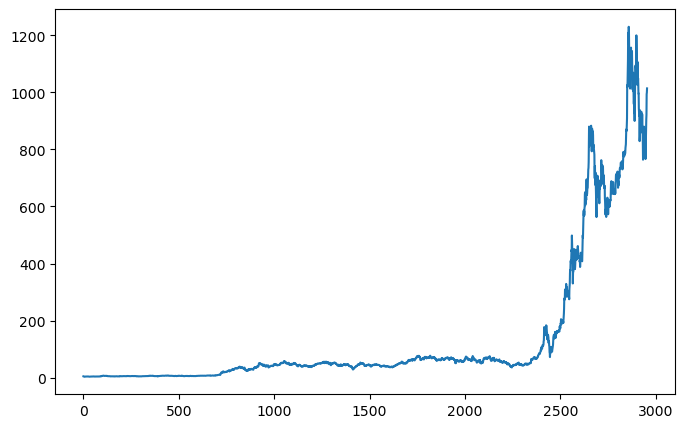

In [19]:
# Plot the stock data by line graph
plt.figure(figsize=(8,5))
data['Close'].plot()
plt.show()

This graph illustrates the fluctuation in Tesla stock prices from 2010 to 2022, providing an overview of its long-term performance.

This above diagram displays a line graph of the closing proces of a stock over time.
- The x-axis represents time, but in this graph, it appears to show numerical indices rather than specific dates. These indices correspond to the sequential order of the dates in our dataset.
- The y-axis represents the closing price of Tesla stock. The values range from 0 to 1200, indicating the stock's closing price in some currency (likely USD).

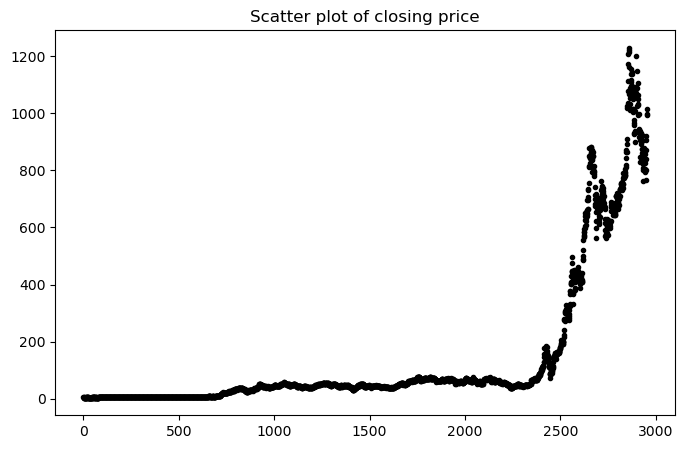

In [21]:
df_close = data['Close']
plt.figure(figsize=(8,5))
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In this scatter plot, each black dot represents a closing price of Tesla stock over time. This helps us visualize the distribution and variability of the closing prices over the period covered by the dataset.

### Calculating Price Difference
This column will calculate the difference between the next day's closing price and the current day's closing price. Then creates a new column price_diff which shows how much the closing price changed from one day to the next.


In [23]:
# Creating a new column for price difference

data['price_diff']=data['Close'].shift(-1)-data['Close']
data['price_diff']

0       -0.012000
1       -0.374000
2       -0.552000
3       -0.618000
4       -0.062000
          ...    
2951    15.769958
2952    72.820007
2953     5.130005
2954    14.809998
2955          NaN
Name: price_diff, Length: 2956, dtype: float64

### Calculating Daily Returns

This divides the daily price difference by the current day's closing price. It tells you the percentage change in the closing price from one day to the next.

In [36]:
# Creating a new column for daily return

data['daily_rn']=data['price_diff']/data['Close']
data['daily_rn']

0      -0.002512
1      -0.078473
2      -0.125683
3      -0.160937
4      -0.019243
          ...   
2951    0.017418
2952    0.079053
2953    0.005161
2954    0.014823
2955         NaN
Name: daily_rn, Length: 2956, dtype: float64

### Plotting the Moving Average and Closing 
This visualization helps you see how the closing prices move in relation to their 50-day average, providing insight into the overall trend of the stock prices.

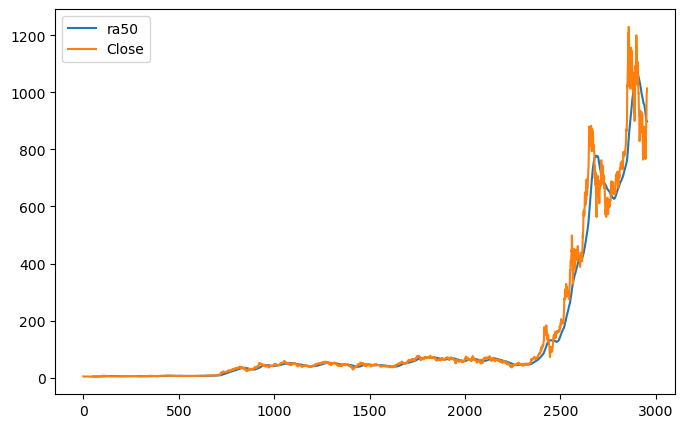

In [52]:
data['ra50']=data['Close'].rolling(50).mean()
plt.figure(figsize=(8,5))
data['ra50'].plot()
data['Close'].plot()
plt.legend()
plt.show()

### Calculating the probability of Tesla's stock dropping by more than 10% in one day

In [54]:
# Calculate the daily return
data['daily_rn'] = data['price_diff'] / data['Close']

# Identify days with drops greater than 10%
drop_days = data[data['daily_rn'] < -0.10]  # This filters the DataFrame to include only the days where the daily return is less than -10%. 

# Calculate the probability of a drop greater than 10%
probability_of_drop = len(drop_days) / len(data)

# Print the probability
print(f"The probability of Tesla's stock dropping by more than 10% in one day is {probability_of_drop:.4f}")


The probability of Tesla's stock dropping by more than 10% in one day is 0.0078


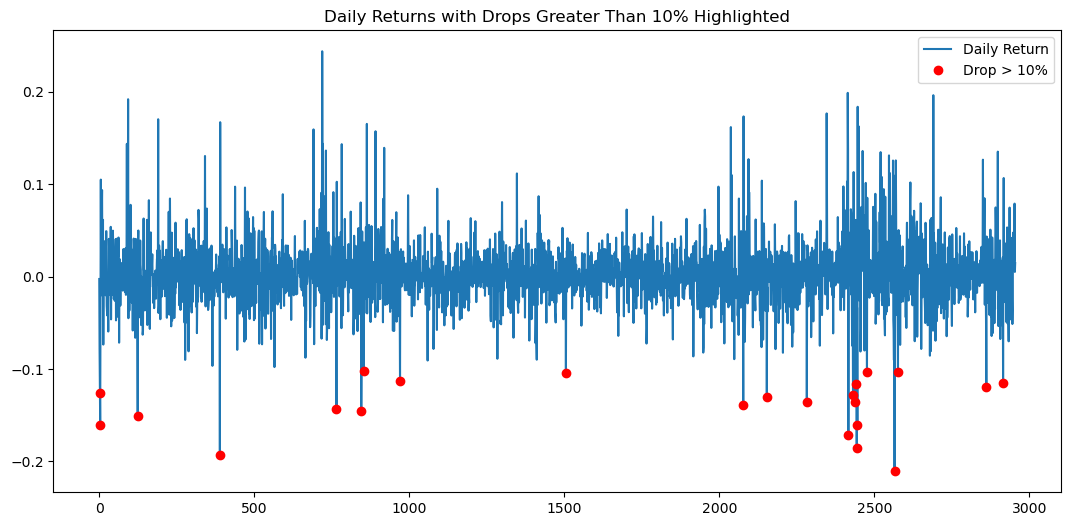

In [65]:
plt.figure(figsize=(13, 6))
data['daily_rn'].plot(label='Daily Return')
drop_days['daily_rn'].plot(style='ro', label='Drop > 10%')
plt.legend()
plt.title('Daily Returns with Drops Greater Than 10% Highlighted')
plt.show()

This visualization plots the daily returns and highlights the days with drops greater than 10% in red.

## Conclusion
In conclusion, this project has provided a detailed analysis of Tesla's stock performance, offering insights into its historical trends and daily fluctuations. Through visual representations and statistical measures, we've explored how Tesla's stock prices have evolved over the years and assessed the likelihood of significant daily price movements. Understanding these dynamics not only informs investment decisions but also enhances our understanding of Tesla's market behavior. Looking ahead, further analyses could delve deeper into specific market events or compare Tesla's performance with industry benchmarks, providing even more comprehensive insights for investors and analysts alike.